In [733]:
import matplotlib.pyplot as plt
import numpy as np

Equally spaced or random uniform initial positions

Velocities can be drawn from well defined values $\{−v_0, 0, +v_0\}$ or from a gaussian Maxwell velocity distributions.

Situation where the numbers of $A$ and $\overline A$ are exactly the same or not

In [734]:
n_p = 5 # nb of particles
n_a = 5 # nb of anti-particles
n = n_p + n_a

L = 1 # box size
v0 = 1 # particles initial velocity

N = 200 # number of time steps
dt = 1/400 # time step interval

# Place particles at even intervals along the axis
x = np.zeros((N, n))
x[0] = L*np.linspace(0, 1, n)
# Randomly assign `n_p` particle and `n_a` anti-particle states,
# respectively labeled with 1 and -1.
particles = np.concatenate((np.zeros(n_p), np.ones(n_a)))
np.random.shuffle(particles)
particles[particles == 0] = -1

# Give random initial velocities to the particles: either -v0, 0
# or v0.
v = np.array([-v0 if v <= v0*1/3
     else 0 if v <= v0*2/3
     else v0 
     for v in v0*np.random.rand(n)])

Compute positions $x_j(iδt)$ for a discrete sequence of time values $iδt$.
Particles are put back in the interval $[0, L]$ whenever they escape.

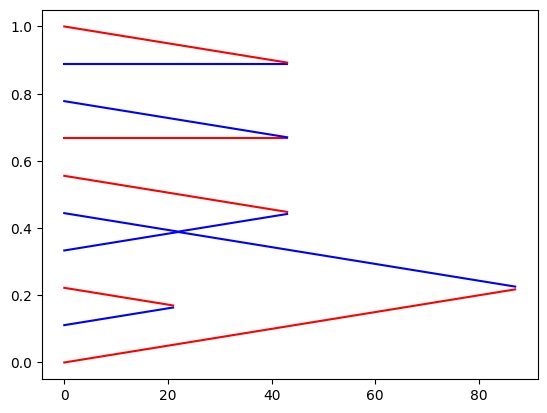

In [735]:
for t in range(N-1):
    # Move all particles by one step
    x[t + 1] = x[t] + v*dt

    # Bounds checking
    for xi in x[t+1]:
        if xi >= L: xi = xi - L
        elif xi < 0: xi = xi + L

    # Collision checking: if the distance between two particles
    # changes sign between t and t+dt, then they must have
    # collided.
    for i in range(n):
        for j in range(i):
            dx = x[t, i] - x[t, j]
            dxt = x[t+1, i] - x[t+1, j]

            # If one is a particle and the other is an anti-particle,
            # then they annihilate each other; else, they bounce off
            # each other in an elastic fashion.
            if dx*dxt < 0:
                if particles[i] == -particles[j]:
                    x[t, i] = x[t, j] = np.nan
                else:
                    v[i] *= -1; v[j] *= -1
                x[t + 1] = x[t] + v*dt

for i, p in enumerate(particles):
    plt.plot(range(N), x[:, i], color = 'b' if p == 1 else 'r')

plt.show()